In [1]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas import read_excel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
file_name = 'ICUfinal.xlsx'
df = pd.read_excel(file_name, sheet_name='Sheet1', engine='openpyxl')
df

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1920,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,0
1921,1921,384,0,50th,1,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,0
1922,1922,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,0
1923,1923,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,NaN,0


Loading data 

In [2]:
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.describe()

,Index,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,962.000000,192.000000,0.467532,0.368831,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,555.843953,111.168431,0.499074,0.482613,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,481.000000,96.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,962.000000,192.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,1443.000000,288.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,1924.000000,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# profile = ProfileReport(df)
# profile.to_file('./profile_report.html')

Checking if the dataset is imbalanced:


/Users/mahsa_shv/Downloads/ml_proj_phase1/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


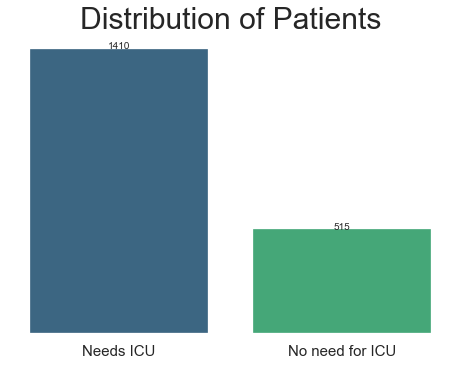

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
g = sns.countplot(df.ICU, palette='viridis')
g.set_xticklabels(['Needs ICU', 'No need for ICU'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Patients', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

We can see from the plot that data is relatively imbalanced enough to benefit from using some balancing techniques. So we will also use "precision"
and "recall" and "Acuarracy" performance metrics just in case! 
(Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading. )

Also, we need an algorithm that works well with imbalanced datasets. For example, "Decision Trees" frequently perform well on imbalanced data. They work by learning a hierachy of if/else questions. This can force both classes to be addressed.

In [5]:
df.columns


Index(['Index', 'PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL',
       'GENDER', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN',
       'ALBUMIN_MEAN',
       ...
       'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
       'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL',
       'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL',
       'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'tags', 'ICU'],
      dtype='object', length=227)

Visualization:

In [6]:
y = df.ICU                          # M or B 
list = ['Index','PATIENT_VISIT_IDENTIFIER','ICU', 'WINDOW']
x = df.drop(list,axis = 1 )
x.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,tags
0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,"Motor Neurone Disease, Smoker"
1,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,"Motor Neurone Disease, Smoker"
2,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Motor Neurone Disease, Smoker"
3,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,"Motor Neurone Disease, Smoker"
4,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,"Motor Neurone Disease, Smoker"


First, we deal with missing values and categorical features to visualize data more correctly.

Imputation:<br>
Missing values affect the performance of the machine learning models.

In [7]:
#Max fill function for categorical columns
x['OTHER'].fillna(x['OTHER'].value_counts().idxmax(), inplace=True)
x['HTN'].fillna(x['HTN'].value_counts().idxmax(), inplace=True)
x['IMMUNOCOMPROMISED'].fillna(x['IMMUNOCOMPROMISED'].value_counts().idxmax(), inplace=True)
x['tags'].fillna('None', inplace=True)

#Filling missing values with medians of the numeric columns
x.select_dtypes(include='number').fillna(x.select_dtypes(include='number').mean().iloc[0], inplace=True)
x.fillna(0, inplace=True)

profile = ProfileReport(x,minimal=True)
# profile.to_file('./profile_report.html')

/Users/mahsa_shv/Downloads/ml_proj_phase1/venv/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
x = pd.get_dummies(x, columns=['AGE_PERCENTIL','AGE_ABOVE65', 'GENDER', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'tags'], drop_first=True)
x.columns



Index(['ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX',
       'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN',
       'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF',
       ...
       'tags_asthma, Motor Neurone Disease',
       'tags_asthma, Motor Neurone Disease, Smoker', 'tags_asthma, Smoker',
       'tags_heart disease', 'tags_heart disease, Kidney disease',
       'tags_heart disease, Motor Neurone Disease',
       'tags_heart disease, asthma',
       'tags_heart disease, asthma, Kidney disease, Smoker',
       'tags_heart disease, asthma, Motor Neurone Disease',
       'tags_heart disease, asthma, Smoker'],
      dtype='object', length=259)

In [9]:
# data_dia = y
# data = x
# #data_n_2 = (data - data.mean()) / (data.std())              # standardization
# data = pd.concat([y,data.iloc[:,0:10]],axis=1)
# data = pd.melt(data,id_vars="ICU",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(10,10))
# sns.violinplot(x="features", y="value", hue="ICU", data=data,split=True, inner="quart")
# plt.xticks(rotation=90)


 
Feature Engineering and Reducing Dimentionality:

Three benefits of performing feature selection before modeling data:<br>
- Reduces over-fitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves accuracy: Less misleading data means modeling accuracy improves.
- Reduces training time: Less data means that algorithms train faster.

Reasons for Dimentionality Reduction:<br>
- Very large number of features for each training instance may make training extremely slow.
<br>
- Difficult to visualize dataset containing large number of features.

In [10]:
correlated_features = set()
correlation_matrix = x.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features

{'ALBUMIN_MAX',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'BE_ARTERIAL_DIFF',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MIN',
 'BE_VENOUS_DIFF',
 'BE_VENOUS_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MIN',
 'BIC_ARTERIAL_DIFF',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MIN',
 'BIC_VENOUS_DIFF',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MIN',
 'BILLIRUBIN_DIFF',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MIN',
 'BLAST_DIFF',
 'BLAST_MAX',
 'BLAST_MEAN',
 'BLAST_MEDIAN',
 'BLAST_MIN',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'CALCIUM_DIFF',
 'CALCIUM_MAX',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CREATININ_DIFF',
 'CREATININ_MAX',
 'CREATININ_MEAN',
 'CREATININ_MEDIAN',
 'CREATININ_MIN',
 'DIMER_DIFF',
 'DIMER_MAX',
 '

Feature Selection and Dimentionality Reduction with correlation:
Dataset contains a lot of redundant information.


In [11]:
x.drop(labels=correlated_features, axis=1, inplace=True)
len(x.columns)

73

New dataframe Correlation Heatmap:

<AxesSubplot:>

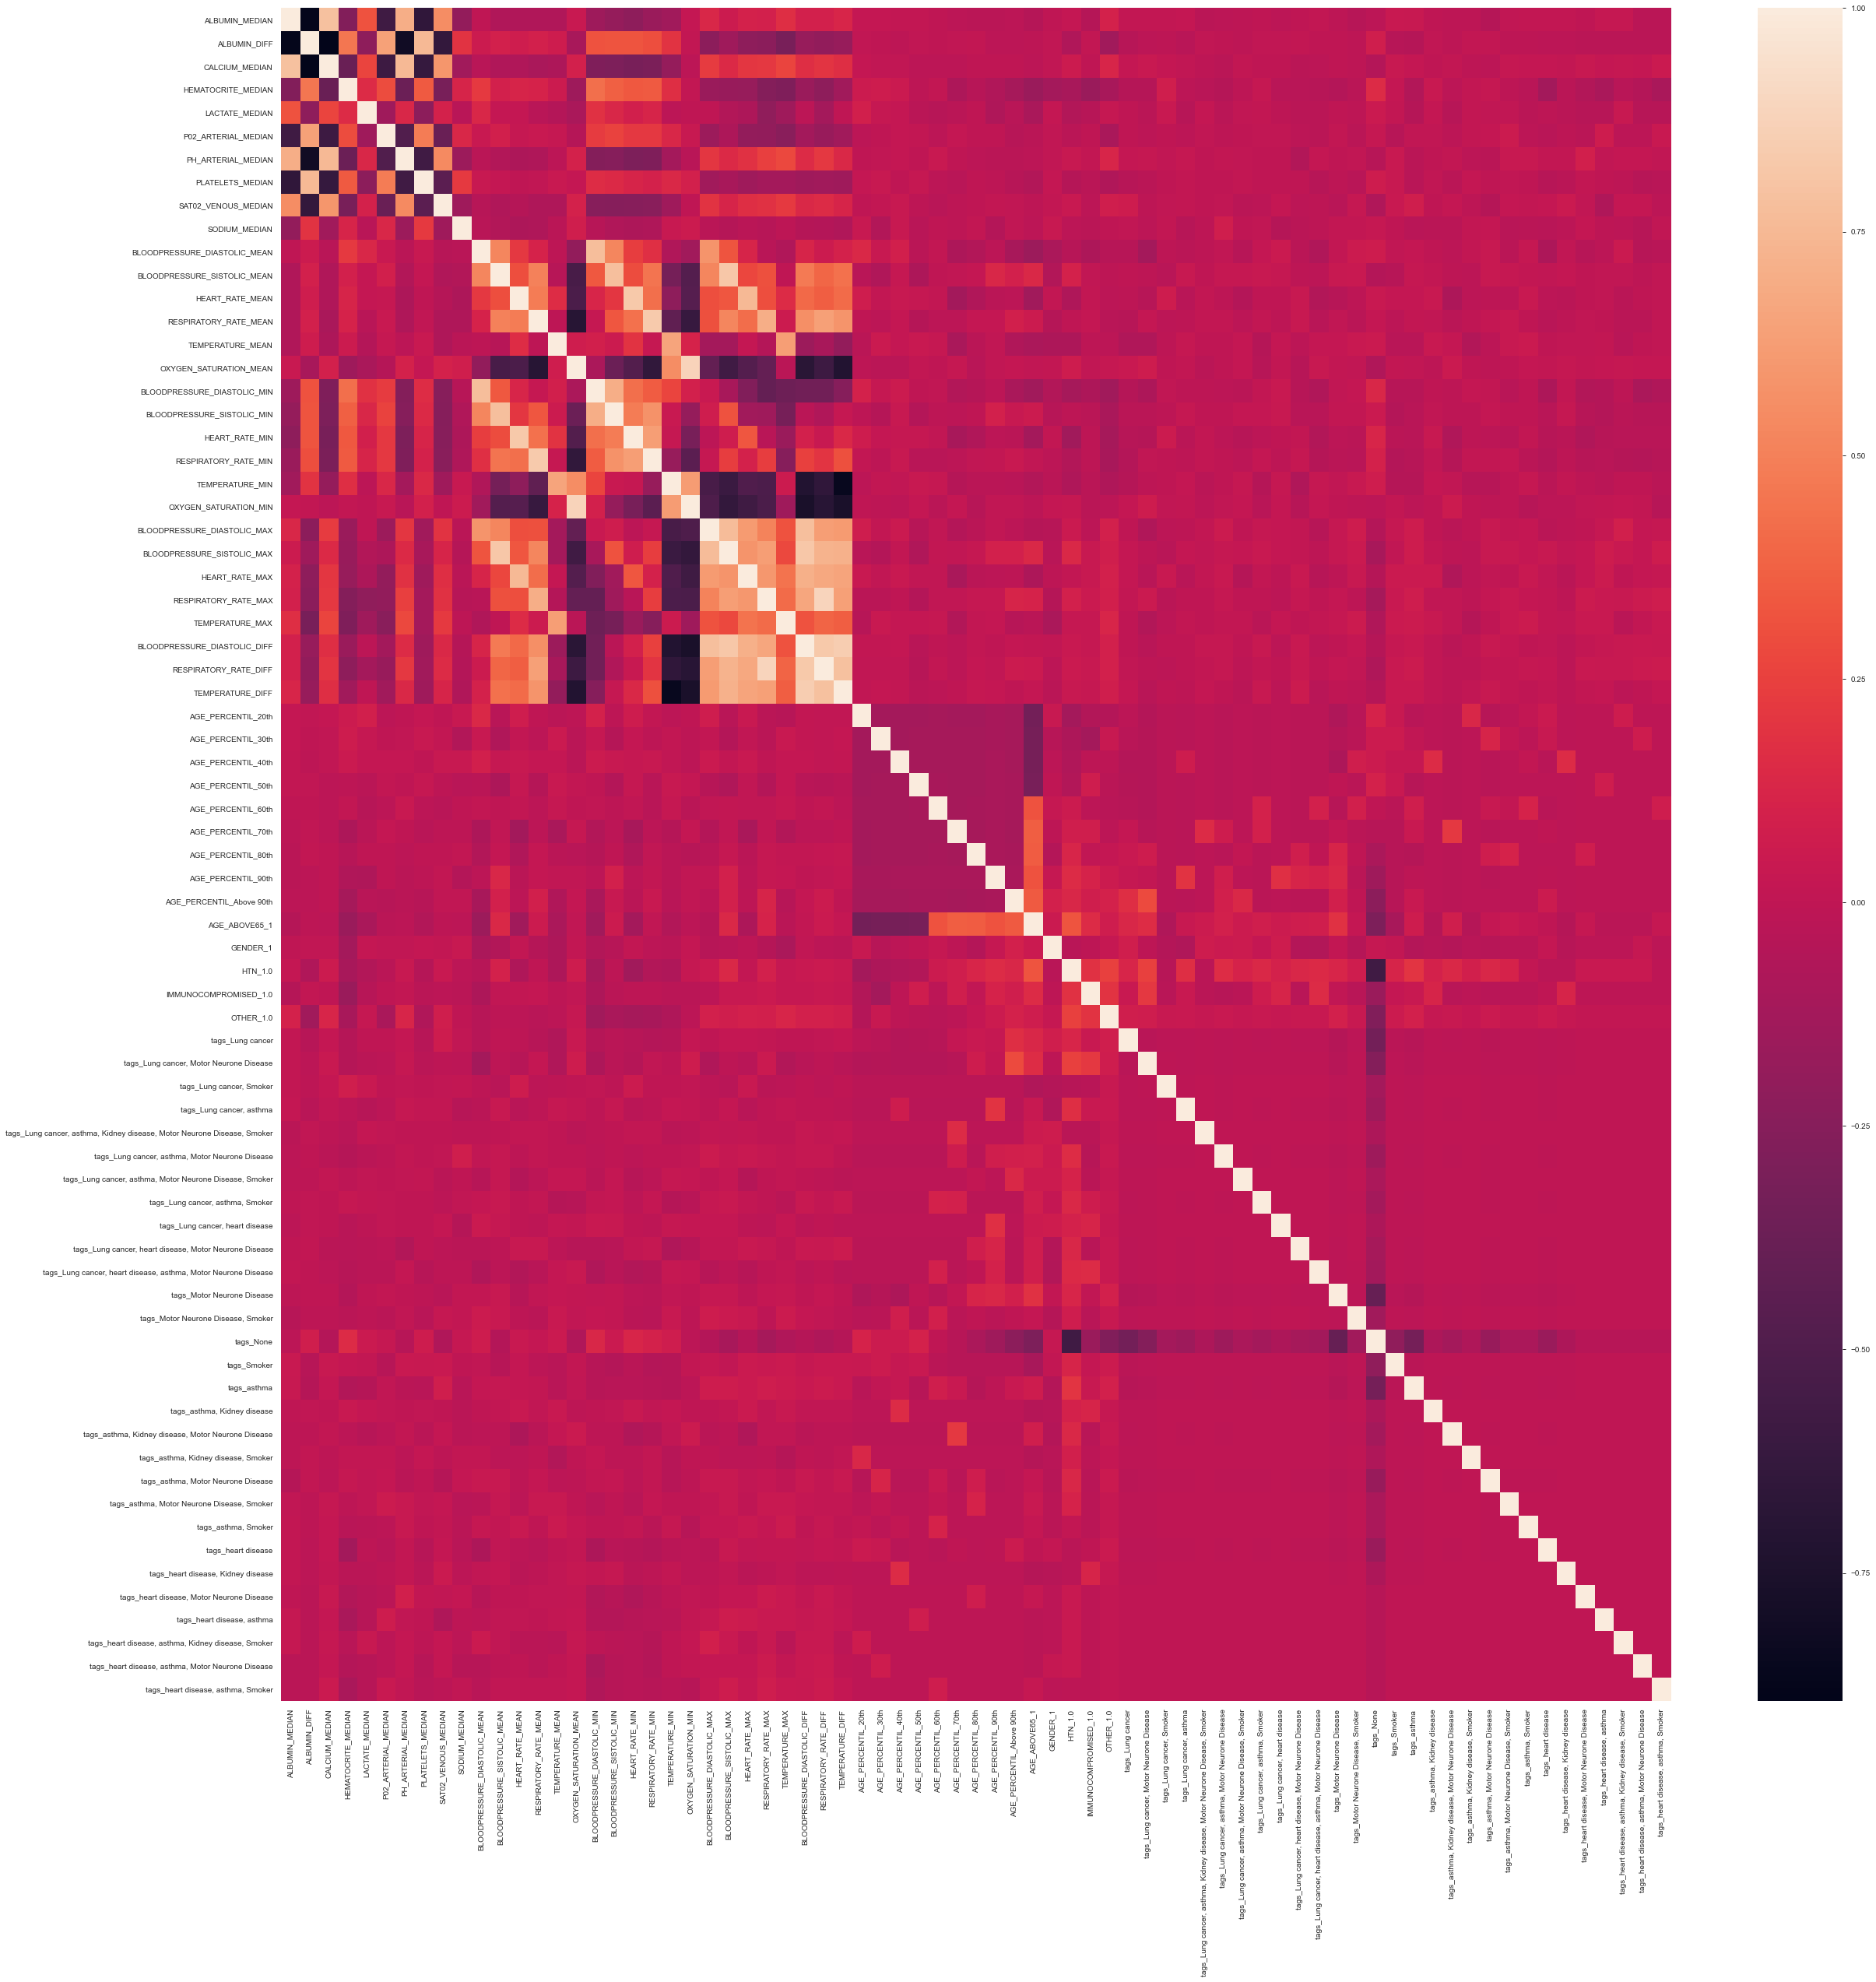

In [12]:
from pylab import savefig
corr = x.corr()
plt.figure(figsize=(40,40))
map = sns.heatmap(corr)
figure = map.get_figure()    
# figure.savefig('./correlation_heatmap2.png', dpi=400)
map


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, 'ALBUMIN_MEDIAN'),
  Text(1, 0, 'ALBUMIN_DIFF'),
  Text(2, 0, 'CALCIUM_MEDIAN'),
  Text(3, 0, 'HEMATOCRITE_MEDIAN'),
  Text(4, 0, 'LACTATE_MEDIAN'),
  Text(5, 0, 'P02_ARTERIAL_MEDIAN'),
  Text(6, 0, 'PH_ARTERIAL_MEDIAN'),
  Text(7, 0, 'PLATELETS_MEDIAN'),
  Text(8, 0, 'SAT02_VENOUS_MEDIAN'),
  Text(9, 0, 'SODIUM_MEDIAN'),
  Text(10, 0, 'BLOODPRESSURE_DIASTOLIC_MEAN'),
  Text(11, 0, 'BLOODPRESSURE_SISTOLIC_MEAN'),
  Text(12, 0, 'HEART_RATE_MEAN'),
  Text(13, 0, 'RESPIRATORY_RATE_MEAN'),
  Text(14, 0, 'TEMPERATURE_MEAN'),
  Text(15, 0, 'OXYGEN_SATURATION_MEAN'),
  Text(16, 0, 'BLOODPRESSURE_DIASTOLIC_MIN'),
  Text(17, 0, 'BLOODPRESSURE_SISTOLIC_MI

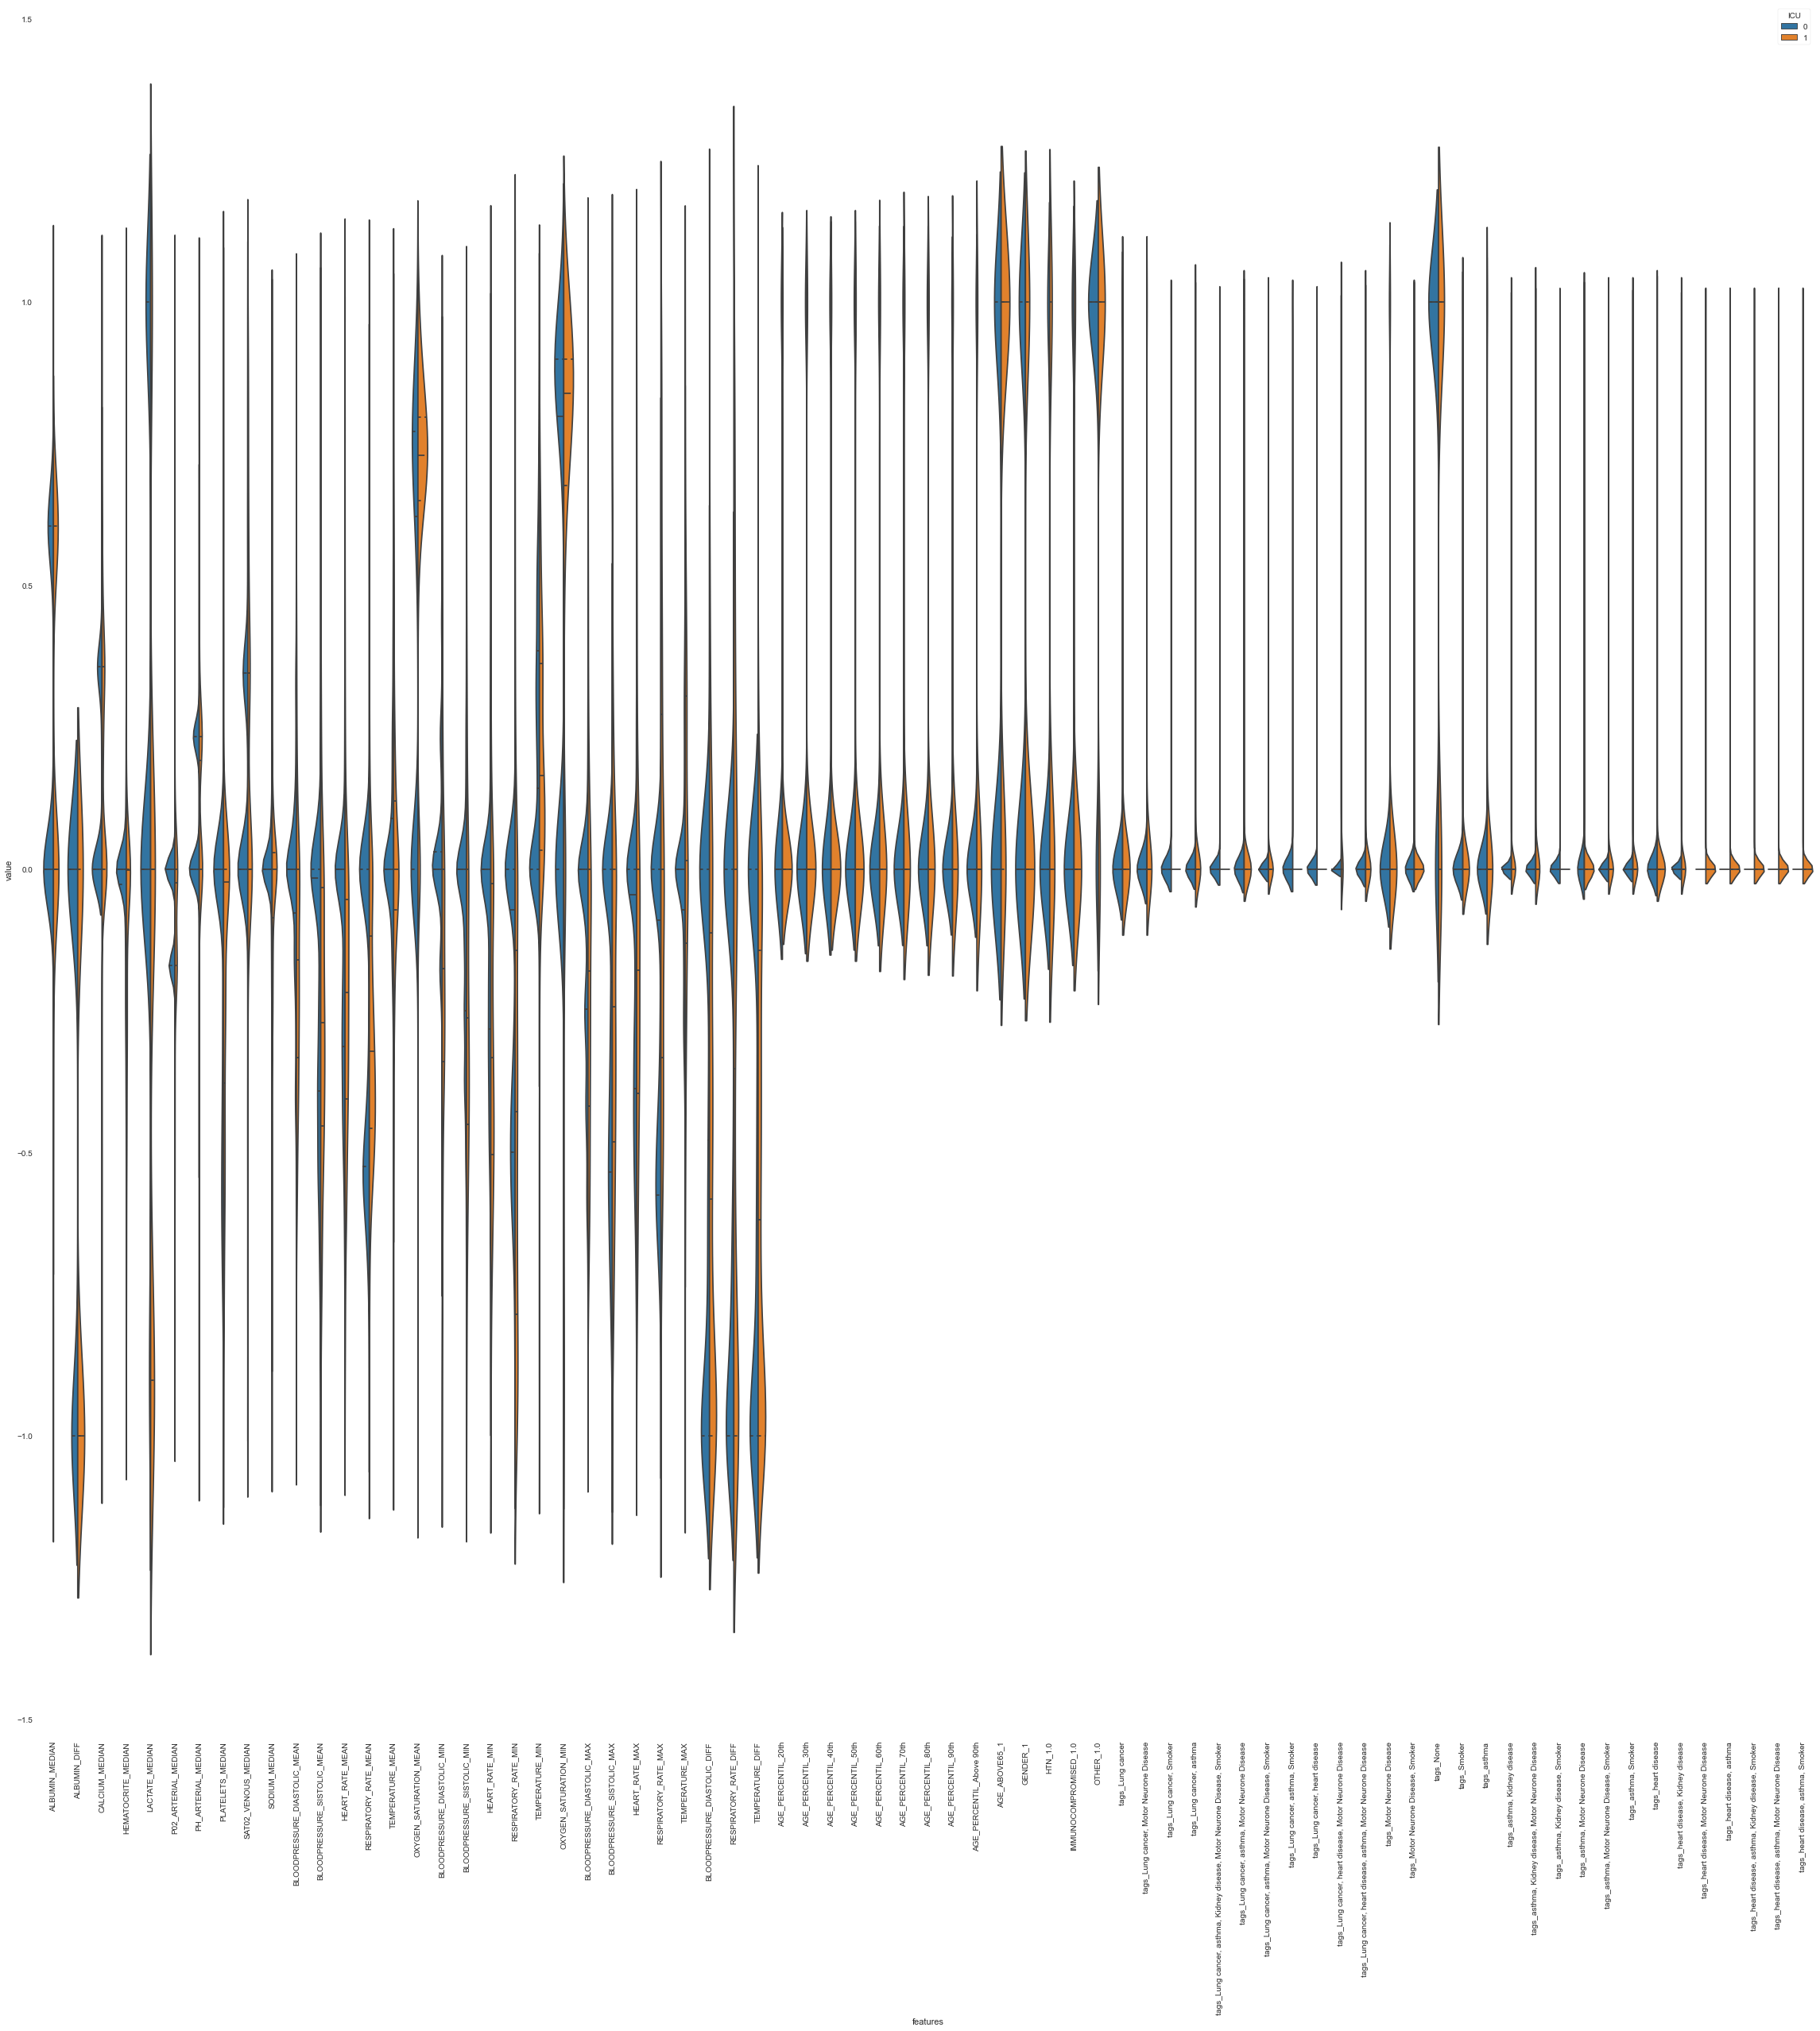

In [13]:
data_dia = y

data = pd.concat([y,x.iloc[:,0:]],axis=1)
data = pd.melt(data,id_vars="ICU",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(40,40))
sns.violinplot(x="features", y="value", hue="ICU", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
import time
sns.set(style="whitegrid", palette="muted")

data_dia = y

data = pd.concat([y,x.iloc[:,0:]],axis=1)
data = pd.melt(data,id_vars="ICU",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(40,40))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="ICU", data=data)

plt.xticks(rotation=90)



Interpretation: <br>
For example, in RESPIRATORY_RATE_MEAN feature, median of the ICU = 0 and ICU = 1 looks separated so it can be good for classification. However, in ALBUMIN_DIFF feature, the median does not look separated so it does not give good information for classification.
We will use this information for feature selection. (or interpret cross validation)

Splitting test and train data:

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

First Model: <br>
Random Forest Classifier



Recursive feature elimination with cross validation: <br>
Now we will not only find best features but we also find how many features do we need for best accuracy / f1_score.

Optimal number of features : 65
Best features : Index(['ALBUMIN_MEDIAN', 'ALBUMIN_DIFF', 'CALCIUM_MEDIAN',
       'HEMATOCRITE_MEDIAN', 'LACTATE_MEDIAN', 'P02_ARTERIAL_MEDIAN',
       'PH_ARTERIAL_MEDIAN', 'PLATELETS_MEDIAN', 'SAT02_VENOUS_MEDIAN',
       'SODIUM_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_DIASTOLIC_MIN', 'BLOODPRESSURE_SISTOLIC_MIN',
       'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN',
       'OXYGEN_SATURATION_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX',
       'TEMPERATURE_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF',
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'AGE_PERCENTIL_20th',
       'AGE_PERCENTIL_30th', 'AGE_PERCENTIL_40th', 'AGE_PERCENTIL_50th',
       'AGE_PERCENTIL_60th', 'AGE_PERCENTIL_70th', 'AGE_PERCENTIL_80th',
    

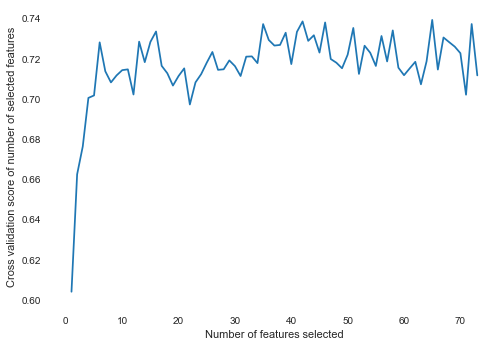

In [15]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring=make_scorer(f1_score))   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

train_preds = rfecv.predict(x_train)
ac = accuracy_score(y_train,train_preds)
print('Accuracy is: ',ac)
f1_tr = f1_score(y_train,train_preds)
print('F1 Score is: ',f1_tr)

Final scoring:<br>
Visualized by Confusion Matrix<br>
- Classification Accuracy is almost universally inappropriate for imbalanced classification!

Accuracy is:  0.8598615916955017
F1 Score is:  0.7235494880546074


<AxesSubplot:>

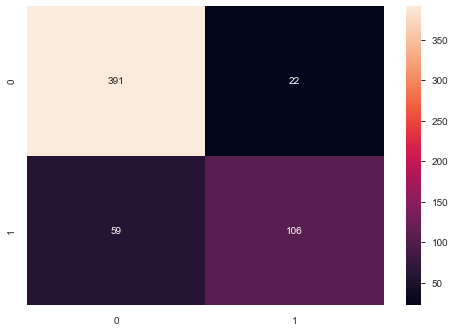

In [16]:
predicts = rfecv.predict(x_test)
ac_2 = accuracy_score(y_test,predicts)
print('Accuracy is: ',ac_2)
f1 = f1_score(y_test,predicts)
print('F1 Score is: ',f1)
cm_2 = confusion_matrix(y_test,predicts)
sns.heatmap(cm_2,annot=True,fmt="d")



Second Model: <br>
SVM

In [17]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn import svm

clf = svm.SVC(kernel='linear',C=1.0)
# rfecv2 = RFECV(estimator=clf, step=1, cv=5,scoring=make_scorer(f1_score))   #5-fold cross-validation
# rfecv2 = rfecv2.fit(x_train, y_train)
clf.fit(x_train, y_train)

#Predict the response for test dataset
train_pred = clf.predict(x_train)


# print('Optimal number of features :', rfecv2.n_features_)
# print('Best features :', x_train.columns[rfecv2.support_])
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score of number of selected features")
# plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_)
# plt.show()

# train_preds = rfecv2.predict(x_train)
ac = accuracy_score(y_train,train_preds)
print('Accuracy is: ',ac)
f1_tr = f1_score(y_train,train_preds)
print('F1 Score is: ',f1_tr)


Accuracy is:  0.9910913140311804
F1 Score is:  0.9827586206896551


Accuracy is:  0.8546712802768166
F1 Score is:  0.6911764705882354


<AxesSubplot:>

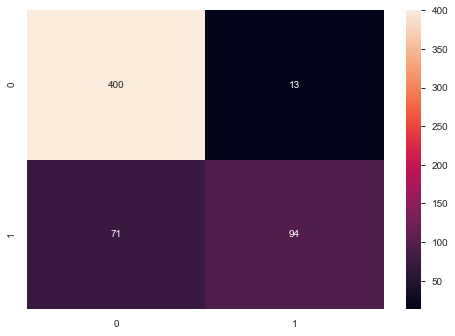

In [18]:
predicts = clf.predict(x_test)
ac_2 = accuracy_score(y_test,predicts)
print('Accuracy is: ',ac_2)
f1 = f1_score(y_test,predicts)
print('F1 Score is: ',f1)
cm_2 = confusion_matrix(y_test,predicts)
sns.heatmap(cm_2,annot=True,fmt="d")

Random Forest Classifier (No Cross-Validation):

In [19]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


clf = RandomForestClassifier()
# rfecv2 = RFECV(estimator=clf, step=1, cv=5,scoring=make_scorer(f1_score))   #5-fold cross-validation
# rfecv2 = rfecv2.fit(x_train, y_train)
clf.fit(x_train, y_train)

#Predict the response for test dataset
train_pred = clf.predict(x_train)


# print('Optimal number of features :', rfecv2.n_features_)
# print('Best features :', x_train.columns[rfecv2.support_])
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score of number of selected features")
# plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_)
# plt.show()

# train_preds = rfecv2.predict(x_train)
ac = accuracy_score(y_train,train_preds)
print('Accuracy is: ',ac)
f1_tr = f1_score(y_train,train_preds)
print('F1 Score is: ',f1_tr)


Accuracy is:  0.9910913140311804
F1 Score is:  0.9827586206896551


Accuracy is:  0.8494809688581315
F1 Score is:  0.690391459074733


<AxesSubplot:>

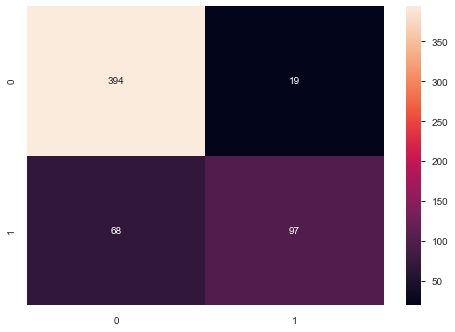

In [20]:
predicts = clf.predict(x_test)
ac_2 = accuracy_score(y_test,predicts)
print('Accuracy is: ',ac_2)
f1 = f1_score(y_test,predicts)
print('F1 Score is: ',f1)
cm_2 = confusion_matrix(y_test,predicts)
sns.heatmap(cm_2,annot=True,fmt="d")



Boosted Decision Tree:

In [21]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_entropy_no_ada = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=5, min_samples_leaf=5)
clf_entropy_no_ada.fit(x_train, y_train)
clf_rf_4 = AdaBoostClassifier(base_estimator= clf_entropy_no_ada,n_estimators=400,learning_rate=1)

clf_rf_4.fit(x_train, y_train)

train_preds = clf_rf_4.predict(x_train)
ac = accuracy_score(y_train,train_preds)
print('Accuracy is: ',ac)
f1_tr = f1_score(y_train,train_preds)
print('F1 Score is: ',f1_tr)

Accuracy is:  0.9910913140311804
F1 Score is:  0.982808022922636


Accuracy is:  0.8477508650519031
F1 Score is:  0.7027027027027025


<AxesSubplot:>

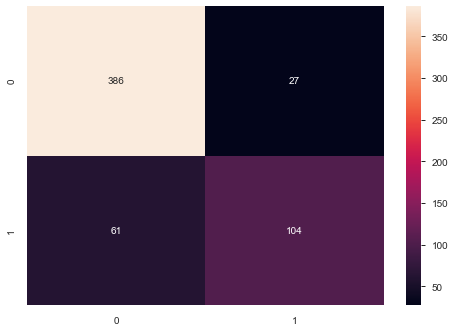

In [22]:
predicts = clf_rf_4.predict(x_test)
ac_2 = accuracy_score(y_test,predicts)
print('Accuracy is: ',ac_2)
f1 = f1_score(y_test,predicts)
print('F1 Score is: ',f1)
cm_2 = confusion_matrix(y_test,predicts)
sns.heatmap(cm_2,annot=True,fmt="d")
